In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
import os 

# Import Data & Clean Data

In [29]:
os.listdir(r"C:\Users\hp\OneDrive\Desktop\Datasets") 

['daikibo-telemetry-data.json',
 'other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [30]:
uber_15= pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Datasets\uber-raw-data-janjune-15_sample.csv")
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [31]:
uber_15.shape

(100000, 4)

In [32]:
type(uber_15)

pandas.core.frame.DataFrame

In [33]:
uber_15.duplicated().sum()

np.int64(54)

In [34]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

# Which month have max. Uber Pickups?

In [35]:
# Convert Pickup_date to datetime
uber_15['month'] = pd.to_datetime(uber_15['Pickup_date'])

# Now extract the month
uber_15['month'].dt.month_name()

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 100000, dtype: object

In [36]:
# Convert to datetime
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

# Extract Month name
uber_15['Month'] = uber_15['Pickup_date'].dt.month_name()
uber_15['Month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: Month, Length: 100000, dtype: object

<Axes: xlabel='Month'>

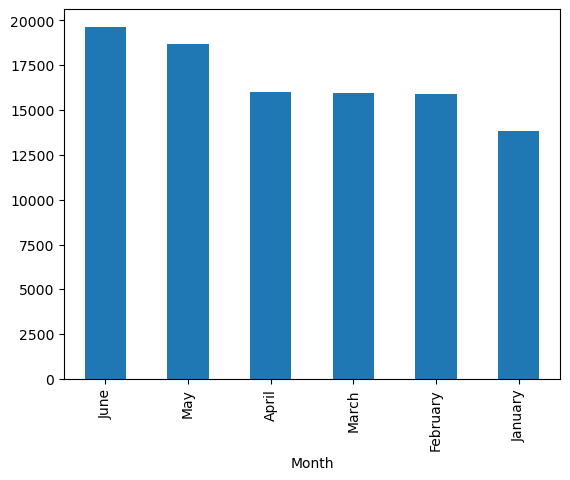

In [37]:
uber_15['Month'].value_counts().plot(kind='bar')

In [38]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [39]:
uber_15.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,Month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,2015-05-02 21:43:00,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,2015-01-20 19:52:59,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,2015-03-19 20:26:00,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,2015-04-10 17:38:00,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,2015-03-23 07:03:00,March,Monday,23,7,3


<Axes: xlabel='Month'>

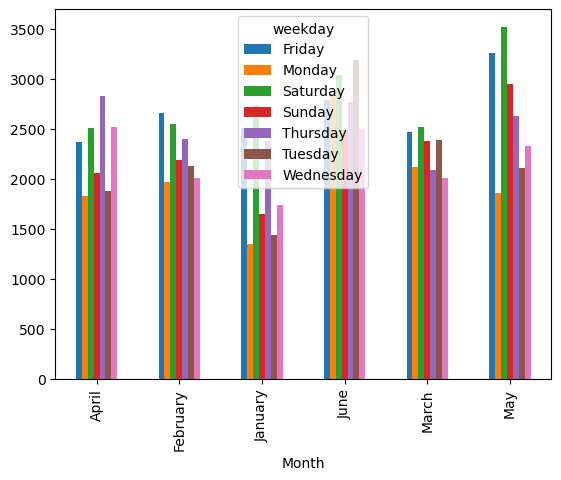

In [40]:
pivot= pd.crosstab(index=uber_15['Month'], columns= uber_15['weekday'])
pivot.plot(kind= 'bar')

# Find out hourly rush in new yock city on all days

In [41]:
summary= uber_15.groupby(['weekday', 'hour'], as_index= False).size()
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,898
165,Wednesday,21,949
166,Wednesday,22,900


In [42]:
print(summary.columns)
print(summary.head())

Index(['weekday', 'hour', 'size'], dtype='object')
  weekday  hour  size
0  Friday     0   581
1  Friday     1   333
2  Friday     2   197
3  Friday     3   138
4  Friday     4   161


<Axes: xlabel='hour', ylabel='size'>

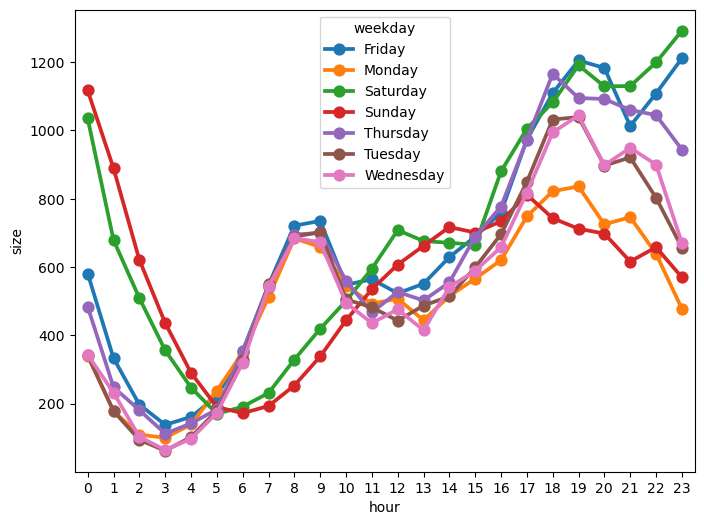

In [43]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='hour', y= 'size', hue= 'weekday',data= summary)

# Analysing most active Uber base- number

In [44]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'Month', 'weekday', 'day', 'hour', 'minute'],
      dtype='object')

In [45]:
uber_foil= pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Datasets\Uber-Jan-Feb-FOIL.csv")
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [46]:
uber_foil.shape

(354, 4)

In [47]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [48]:
!pip install chart_studio
!pip install plotly

In [49]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [50]:
init_notebook_mode(connected= True)

In [51]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [52]:
px.box(x= 'dispatching_base_number', y= 'active_vehicles', data_frame= uber_foil)

In [53]:
px.violin(x= 'dispatching_base_number', y= 'active_vehicles', data_frame= uber_foil)

In [54]:
files = os.listdir(r"C:\Users\hp\OneDrive\Desktop\Datasets")[-8:]

In [55]:
files.remove('uber-raw-data-janjune-15.csv')

In [56]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [57]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [58]:
final= pd.DataFrame()

path= r"C:\Users\hp\OneDrive\Desktop\Datasets"

for file in files:
    current_df= pd.read_csv(path+'/'+file)
    final= pd.concat([current_df, final])

In [59]:
final.shape

(4534327, 4)

In [60]:
final.duplicated().sum()

np.int64(82581)

In [61]:
final.drop_duplicates(inplace=True)
final.shape

(4451746, 4)

In [62]:
final.head(3)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512


# Pair Wise Analysis to figure out Rush?

In [63]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [64]:
final.head(3)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512


In [65]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [66]:
final['Date/Time']= pd.to_datetime(final['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [67]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [68]:
final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [69]:
final.head(4)

,Date/Time,Lat,Lon,Base,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0


In [70]:
pivot= final.groupby(['day', 'hour']).size().unstack()
pivot.style.background_gradient('pink')

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


# How to Automate Our Analysis

In [71]:
def gen_pivot_table (df, col1, col2):
    pivot= df.groupby([col1, col2]).size().unstack()
    return pivot.style.background_gradient()

In [72]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [73]:
gen_pivot_table(final, 'day', 'hour')

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [81]:
# 1. Uber data
uber_15.to_csv("uber_data.csv", index=False)

# 2. Summary (fix Series → DataFrame)
summary = uber_15.groupby(['weekday', 'hour']).size().reset_index(name="count")
summary.to_csv("summary.csv", index=False)

# 3. Pivot (reset index for clean export)
pivot = final.groupby(['day', 'hour']).size().unstack().reset_index()
pivot.to_csv("pivot.csv", index=False)

# 4. Uber foil (already a DataFrame)
uber_foil.to_csv("foil.csv", index=False)

# 5. Files (convert list → DataFrame first)
files_df = pd.DataFrame(files, columns=["file_name"])
files_df.to_csv("files.csv", index=False)

# 6. Final merged dataset
final.to_csv("final.csv", index=False)

print("✅ All CSVs exported successfully!")

✅ All CSVs exported successfully!
